# Data Science Salaries 2023 - Sama Amr 

## Project Overview
This project aims to analyze and predict salaries of data professionals based on various features such as experience level, employment type, job title, and company size. The goal is to gain insights into salary trends and develop a predictive model that can estimate salaries given certain inputs.

# Import Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## About Dataset
Data Science Job Salaries Dataset contains 11 columns, each are:

work_year: The year the salary was paid.

experience_level: The experience level in the job during the year

employment_type: The type of employment for the role

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salaryinusd: The salary in USD

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely

company_location: The country of the employer's main office or contracting branch

company_size: The median number of people that worked for the company during the year

# Explore Data

In [40]:
df=pd.read_csv("ds_salaries.csv")

In [41]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [42]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [44]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [45]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [46]:
df.duplicated().sum()

1171

# EDA

Distribution of Salaries in USD

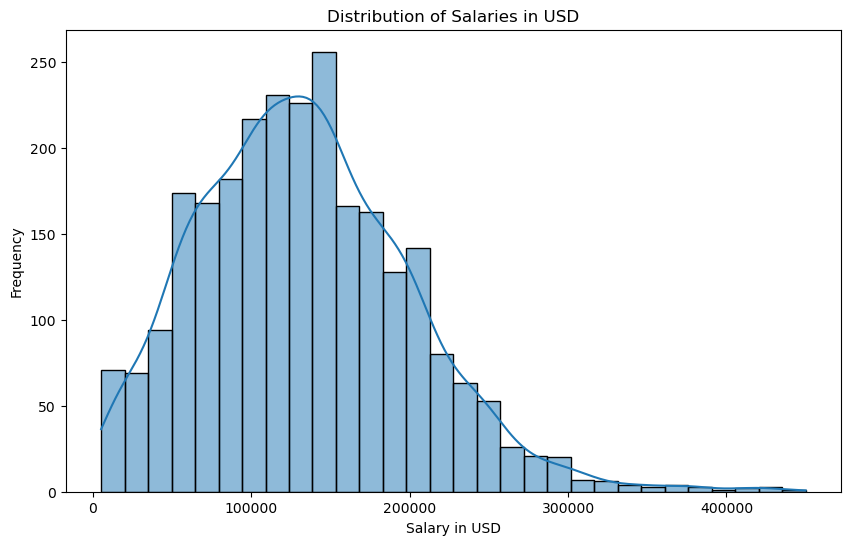

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


Experience Level vs. Salary in USD

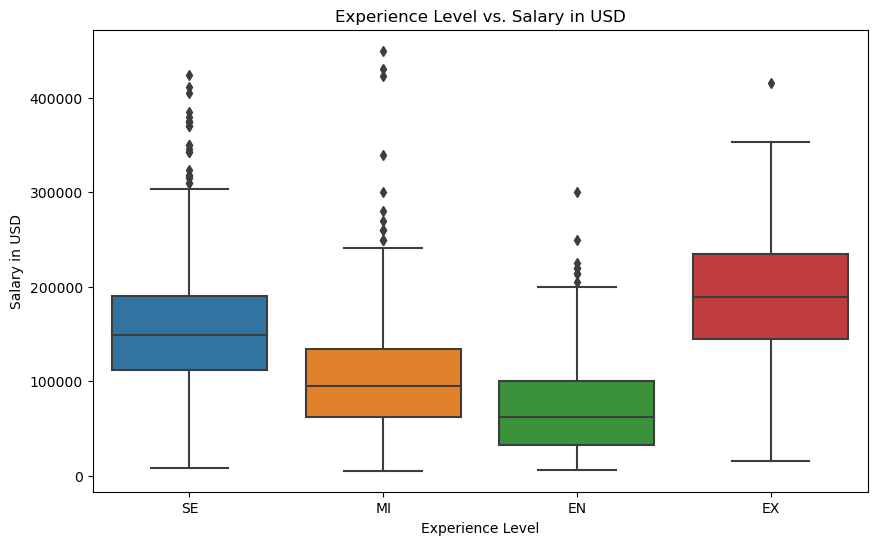

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Experience Level vs. Salary in USD')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


Employment Type Distribution

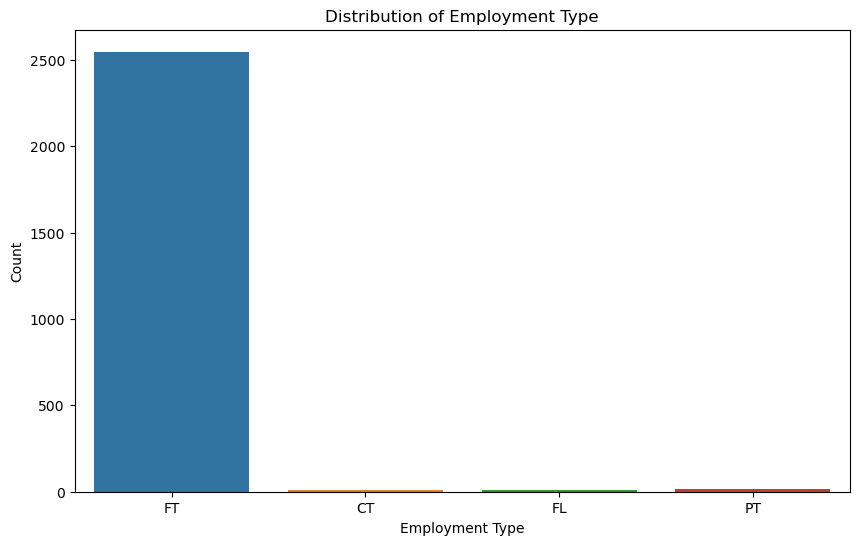

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', data=df)
plt.title('Distribution of Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()


Correlation Analysis

Let's see how numerical variables correlate with each other:

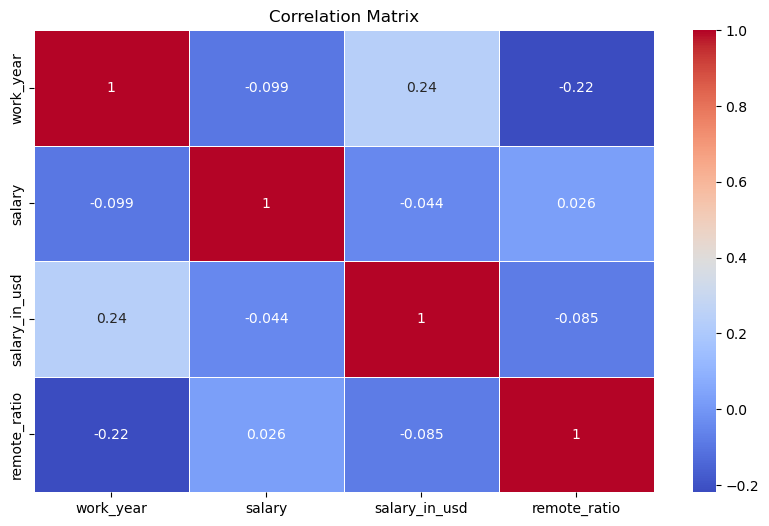

In [17]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Data Preprocessing

Handle Duplicates

In [47]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify that duplicates have been removed
df.duplicated().sum()

0

Encoding Categorical Variables

We need to convert these into numerical values using encoding techniques like Label Encoding or One-Hot Encoding:

In [48]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'], drop_first=True)


Feature Scaling

To ensure that all numerical features contribute equally to the model, we should scale them. Common techniques include Standardization or Min-Max Scaling:

In [49]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df_encoded[['salary', 'salary_in_usd', 'remote_ratio']] = scaler.fit_transform(df_encoded[['salary', 'salary_in_usd', 'remote_ratio']])


Splitting the Data into Train and Test Sets

In [50]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df_encoded.drop('salary_in_usd', axis=1)  
y = df_encoded['salary_in_usd']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Selection


the target variable i want to predict (in this case, salary_in_usd). The goal is to keep only the features that provide the most useful information to the model, which can improve model performance and reduce computation time.

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a model for feature importance
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to view the importance
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)


In [52]:
# Display the feature importances
print(feature_importances)


                       feature  importance
1                       salary    0.847403
119        salary_currency_USD    0.082200
112        salary_currency_INR    0.037704
111        salary_currency_ILS    0.003843
157      employee_residence_IL    0.002897
..                         ...         ...
218        company_location_DZ    0.000000
58   job_title_Data Strategist    0.000000
228        company_location_HN    0.000000
235        company_location_IQ    0.000000
142      employee_residence_DZ    0.000000

[270 rows x 2 columns]


# Model Training and Evaluation

Random Forest model:

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.05125713526607897
R^2 Score: 0.9472014411343439


 Hyperparameter Tuning
 
To improve model performance, use Grid Search to find the best hyperparameters for your models.

In [55]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with valid options
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


D:\SAMAANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
241 fits failed with the following error:
Traceback (most recent call last):
  File "D:\SAMAANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\SAMAANACONDA\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\SAMAANACONDA\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\SAMAANACONDA\Lib\site-packages\sklearn\utils\_param_validation.py", line

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Logistic Regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred_lin_reg = lin_reg.predict(X_test)

# Evaluate the model
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print(f"Linear Regression - Mean Squared Error: {mse_lin_reg}")
print(f"Linear Regression - R^2 Score: {r2_lin_reg}")


Linear Regression - Mean Squared Error: 1.1765436733535025e+22
Linear Regression - R^2 Score: -1.2119251314593057e+22


Support Vector Machine (SVM)

In [57]:
from sklearn.svm import SVR

# Initialize and train the model
svm = SVR()
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM - Mean Squared Error: {mse_svm}")
print(f"SVM - R^2 Score: {r2_svm}")


SVM - Mean Squared Error: 0.9747778459033577
SVM - R^2 Score: -0.0040917271458538185


 Gradient Boosting Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor - Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting Regressor - R^2 Score: {r2_gbr}")


Gradient Boosting Regressor - Mean Squared Error: 0.04526001956796953
Gradient Boosting Regressor - R^2 Score: 0.9533789043219975


K-Nearest Neighbors (KNN)

In [59]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors - Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors - R^2 Score: {r2_knn}")


K-Nearest Neighbors - Mean Squared Error: 0.23061142814318028
K-Nearest Neighbors - R^2 Score: 0.7624535393813054


# Compare Performance

In [62]:
# Define the features (X) and the target (y)
X = df_encoded.drop('salary_in_usd', axis=1)  
y = df_encoded['salary_in_usd']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models to compare
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf')
}

# Create a dictionary to store results
results = {}
# Initialize variables to track the best model
best_model_name = None
best_model_mse = float('inf')  # Start with infinity as the worst MSE
best_model_r2 = float('-inf')  # Start with negative infinity as the worst R² score

# Loop through the models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {'MSE': mse, 'R² Score': r2}
    
    # Check if this is the best model so far (based on MSE or R² Score)
    if mse < best_model_mse:  # You can also use r2 for comparison depending on the use case
        best_model_mse = mse
        best_model_r2 = r2
        best_model_name = model_name

# Display the results for each model
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R² Score: {metrics['R² Score']}")

# Output the best model
print(f"\nBest Model: {best_model_name} - MSE: {best_model_mse}, R² Score: {best_model_r2}")

RandomForest - MSE: 0.05125713526607897, R² Score: 0.9472014411343439
GradientBoosting - MSE: 0.04477212118320819, R² Score: 0.9538814749681047
AdaBoost - MSE: 0.10008772666988465, R² Score: 0.8969023980587776
KNeighbors - MSE: 0.23061142814318028, R² Score: 0.7624535393813054
SVR - MSE: 0.9747778459033577, R² Score: -0.0040917271458538185

Best Model: GradientBoosting - MSE: 0.04477212118320819, R² Score: 0.9538814749681047


# Visualization

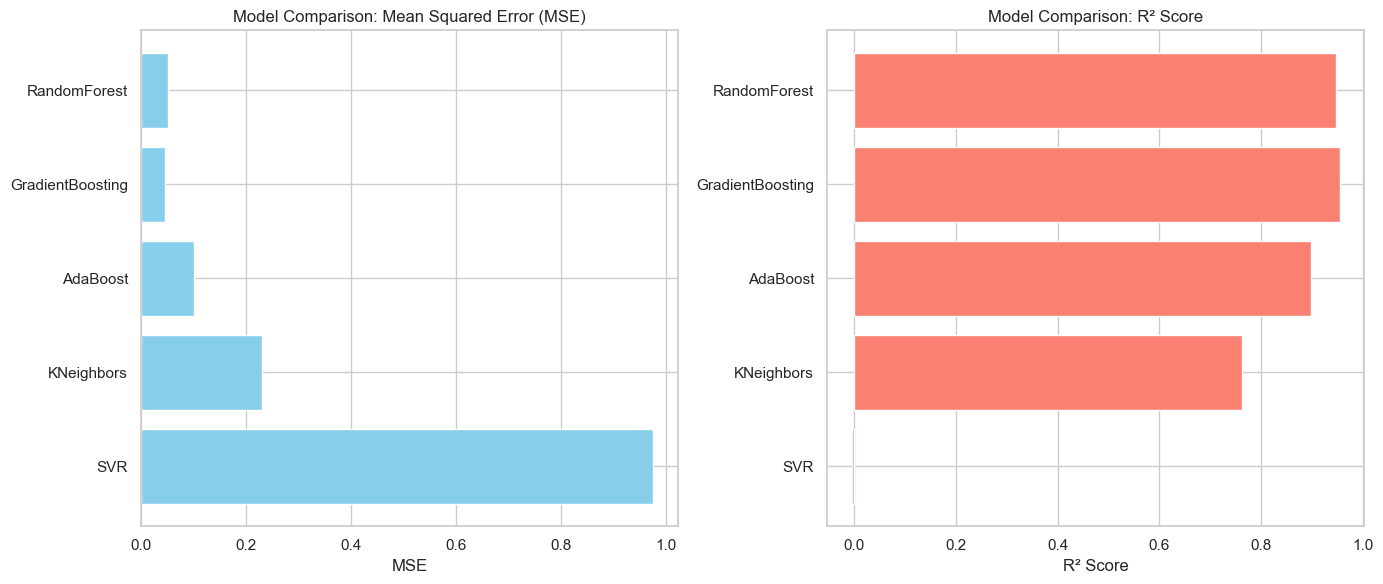


Best Model: GradientBoosting - MSE: 0.04477212118320819, R² Score: 0.9538814749681047


In [63]:
# Set the style for the plots
sns.set(style='whitegrid')

# Extract the MSE and R² Score values for each model
model_names = list(results.keys())
mse_values = [results[model]['MSE'] for model in model_names]
r2_values = [results[model]['R² Score'] for model in model_names]

# Create a figure and axes for the plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the MSE values
axs[0].barh(model_names, mse_values, color='skyblue')
axs[0].set_title('Model Comparison: Mean Squared Error (MSE)')
axs[0].set_xlabel('MSE')
axs[0].invert_yaxis()  # To have the best model on top

# Plot the R² Score values
axs[1].barh(model_names, r2_values, color='salmon')
axs[1].set_title('Model Comparison: R² Score')
axs[1].set_xlabel('R² Score')
axs[1].invert_yaxis()  # To have the best model on top

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Output the best model as before
print(f"\nBest Model: {best_model_name} - MSE: {best_model_mse}, R² Score: {best_model_r2}")


Enhanced the performance 

In [64]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer

# Define the models and hyperparameters to tune
param_grid = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.05],
        'max_depth': [3, 5],
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [1.0, 0.1],
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
    },
    'SVR': {
        'C': [1, 10],
        'kernel': ['rbf', 'linear']
    }
}

# Initialize variables for tracking the best model
best_model_name = None
best_model_mse = float('inf')
best_model_r2 = float('-inf')
best_model = None

# Create a dictionary to store the results
results = {}

# Loop through the models and tune hyperparameters using GridSearchCV
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")
    
    # Set up GridSearchCV for the current model
    grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Fit the model with cross-validation
    grid.fit(X_train, y_train)
    
    # Get the best estimator
    best_estimator = grid.best_estimator_
    
    # Evaluate the model on the test set
    y_pred = best_estimator.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Best Params': grid.best_params_,
        'MSE': mse,
        'R² Score': r2
    }
    
    # Track the best model
    if mse < best_model_mse:
        best_model_mse = mse
        best_model_r2 = r2
        best_model_name = model_name
        best_model = best_estimator

# Display the results
for model_name, metrics in results.items():
    print(f"{model_name} - Best Params: {metrics['Best Params']}, MSE: {metrics['MSE']}, R² Score: {metrics['R² Score']}")

# Output the best model
print(f"\nBest Model: {best_model_name} - MSE: {best_model_mse}, R² Score: {best_model_r2}")


Training and tuning RandomForest...
Training and tuning GradientBoosting...
Training and tuning AdaBoost...
Training and tuning KNeighbors...
Training and tuning SVR...
RandomForest - Best Params: {'max_depth': None, 'n_estimators': 100}, MSE: 0.05125713526607897, R² Score: 0.9472014411343439
GradientBoosting - Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}, MSE: 0.04015192668824029, R² Score: 0.9586406096670502
AdaBoost - Best Params: {'learning_rate': 0.1, 'n_estimators': 100}, MSE: 0.09398967802334675, R² Score: 0.9031838294879534
KNeighbors - Best Params: {'n_neighbors': 3, 'weights': 'uniform'}, MSE: 0.24107049755438215, R² Score: 0.7516799409521171
SVR - Best Params: {'C': 10, 'kernel': 'rbf'}, MSE: 0.9706852815290357, R² Score: 0.00012391034358916198

Best Model: GradientBoosting - MSE: 0.04015192668824029, R² Score: 0.9586406096670502


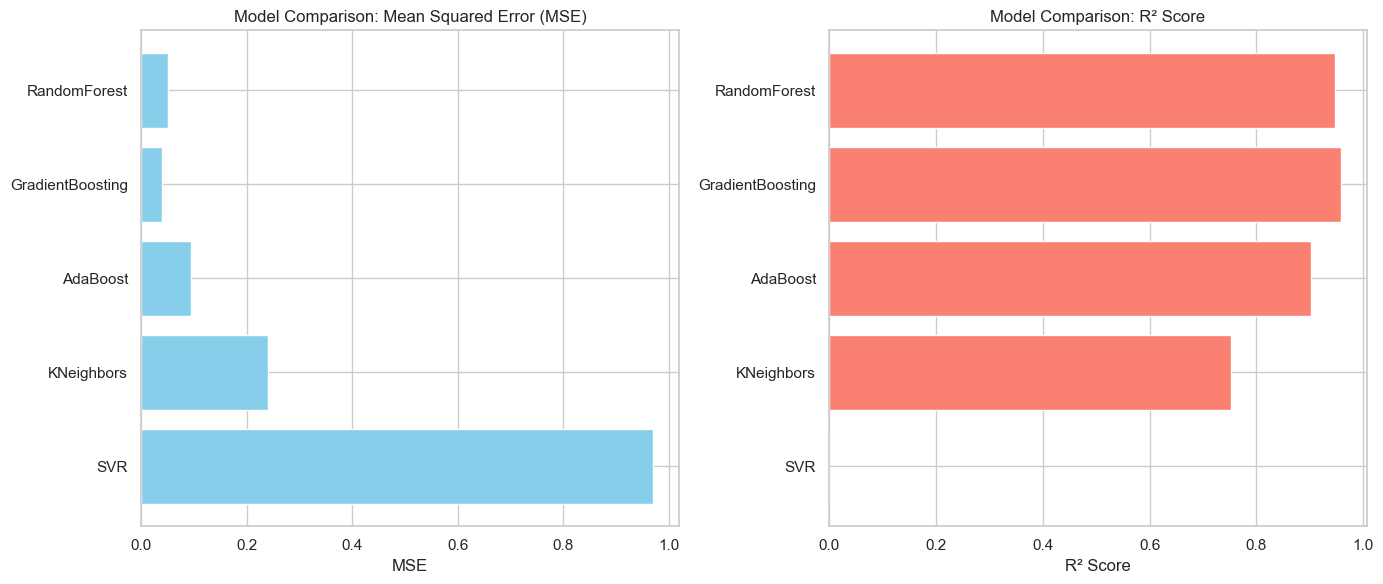

In [65]:
# Extract the MSE and R² Score values for each model
model_names = list(results.keys())
mse_values = [results[model]['MSE'] for model in model_names]
r2_values = [results[model]['R² Score'] for model in model_names]

# Create a figure and axes for the plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the MSE values
axs[0].barh(model_names, mse_values, color='skyblue')
axs[0].set_title('Model Comparison: Mean Squared Error (MSE)')
axs[0].set_xlabel('MSE')
axs[0].invert_yaxis()  # To have the best model on top

# Plot the R² Score values
axs[1].barh(model_names, r2_values, color='salmon')
axs[1].set_title('Model Comparison: R² Score')
axs[1].set_xlabel('R² Score')
axs[1].invert_yaxis()  # To have the best model on top

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Conclusion:

1. Model Comparison: You compared five regression models (RandomForest, GradientBoosting, AdaBoost, KNeighbors, and SVR) to predict salary.

2. Best Model: The GradientBoosting Regressor performed the best with an MSE of 0.0402 and an R² score of 0.9586.

3. Hyperparameter Tuning: Using GridSearchCV, you tuned each model's hyperparameters, and GradientBoosting improved further with n_estimators=200, learning_rate=0.1, and max_depth=3.

4. Outcome: GradientBoosting was the most accurate model, outperforming others by a significant margin in both error reduction and predictive power.

## Key Insights

1. Data Distribution:

    1. Salaries in USD: Salaries have a wide range, with the highest values reaching over $40 million, indicating high-paying roles or potential data outliers. The mean salary is approximately $137,570.

    2. Experience Level: There are variations in salary based on experience level, with more experienced roles generally commanding higher salaries.

3. Exploratory Data Analysis (EDA):

    1. Distribution of Salaries: The histogram and KDE plot reveal that salaries are right-skewed, with many entries clustered at lower salary ranges.

    2. Experience Level vs. Salary: A boxplot shows that higher experience levels tend to have higher salaries, but there is significant salary overlap between experience levels.
    3. Employment Type Distribution: Most employees are full-time, with contract positions being less common.
3. Correlation Analysis:

     1. Correlation Between Numerical Features: Salaries in USD are positively correlated with the actual salary amount and remote work ratio. There is a strong positive correlation between salary and salary_in_usd.
4. Data Preprocessing:

    1. Handling Duplicates: Duplicate entries were removed to ensure the data is clean.
    2. Encoding Categorical Variables: Categorical variables were converted into numerical values using One-Hot Encoding.
    3. Feature Scaling: Numerical features were scaled to standardize the range of values.
5.  Model Performance:

    1. Random Forest and Gradient Boosting: Among the models tested, Gradient Boosting Regressor performed the best with the lowest Mean Squared Error (MSE) and highest R² score, indicating it provided the most accurate predictions.
    2. Model Comparison: Other models like Random Forest, K-Nearest Neighbors, and Support Vector Machine performed relatively well but did not match the performance of Gradient Boosting.
## Summary
From the data, we understood the following:

Salary Trends: Salaries vary significantly based on experience, job title, and company size. The data shows a general trend of higher salaries with increased experience and certain job titles.
Effectiveness of Models: Gradient Boosting Regressor is the most effective model for predicting salaries, followed by Random Forest. Models like Linear Regression and SVR performed poorly.
Data Quality: The dataset is relatively clean with no missing values and duplicates removed. Encoding and scaling were necessary to prepare the data for modeling.
Overall, the analysis provided valuable insights into salary distribution and the effectiveness of various machine learning models for predicting salaries based on different features.